In [258]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


def show_frequency(path, labelName = 'label',contextName = 'root_text',word_count = 50,fileName='toxic_word_freq',toxicity = 1,color = 'orangered'):

    df = pd.read_csv(path)
    df = df.drop(columns=['id'])
        
    # 'label' sütununda toksik (1) olanları filtrele
    toxic_texts = df[df["label"] == toxicity]["root_text"]
    
    title = 'Toksik olmayan'
    if toxicity==1:
        title = 'Toksik'
    
    # Tüm toksik cümlelerdeki kelimeleri birleştir
    all_words = " ".join(str(text) for text in toxic_texts).split()
    
    # Kelime frekanslarını hesapla
    word_counts = Counter(all_words)
    
    # En sık geçen ilk 20 kelimeyi seç
    most_common_words = word_counts.most_common(word_count)
    
    # Kelimeleri ve frekanslarını ayrı listelere ayır
    words, counts = zip(*most_common_words)
    
    # Çubuk grafiği oluştur
    plt.figure(figsize=(word_count/2, word_count/5))
    plt.bar(words, counts, color=color)
    plt.xlabel("Kelimeler")
    plt.ylabel("Frekans")
    plt.title(f"{title} Cümlelerde En Sık Geçen {word_count} Kelime")
    plt.xticks(rotation=45)
    plt.tight_layout()
    if fileName:
        plt.savefig(f'{fileName}.png')
    plt.show()

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(dataframe,show_count=20,max_features = 40000):
    # Initialize the TfidfVectorizer with a limit on the number of features
    vectorizer = TfidfVectorizer(max_features=40000)  # Adjust max_features as needed
    
    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(dataframe)
    
    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Calculate the mean TF-IDF score for each word using sparse matrix
    mean_tfidf = tfidf_matrix.mean(axis=0).A1  # A1 converts the 2D array to 1D
    mean_tfidf_series = pd.Series(mean_tfidf, index=feature_names)
    
    # Sort and select the top N words
    top_n = show_count  # You can change this value
    top_words = mean_tfidf_series.sort_values(ascending=False).head(top_n)
    
    # Create a bar plot
    plt.figure(figsize=(30, 6))
    top_words.plot(kind='bar', color='skyblue')
    plt.title('Top Weighted Words in TF-IDF')
    plt.xlabel('Words')
    plt.ylabel('Mean TF-IDF Score')
    plt.xticks(rotation=45)
    plt.savefig('toxic_tfidf.png')
    plt.show()


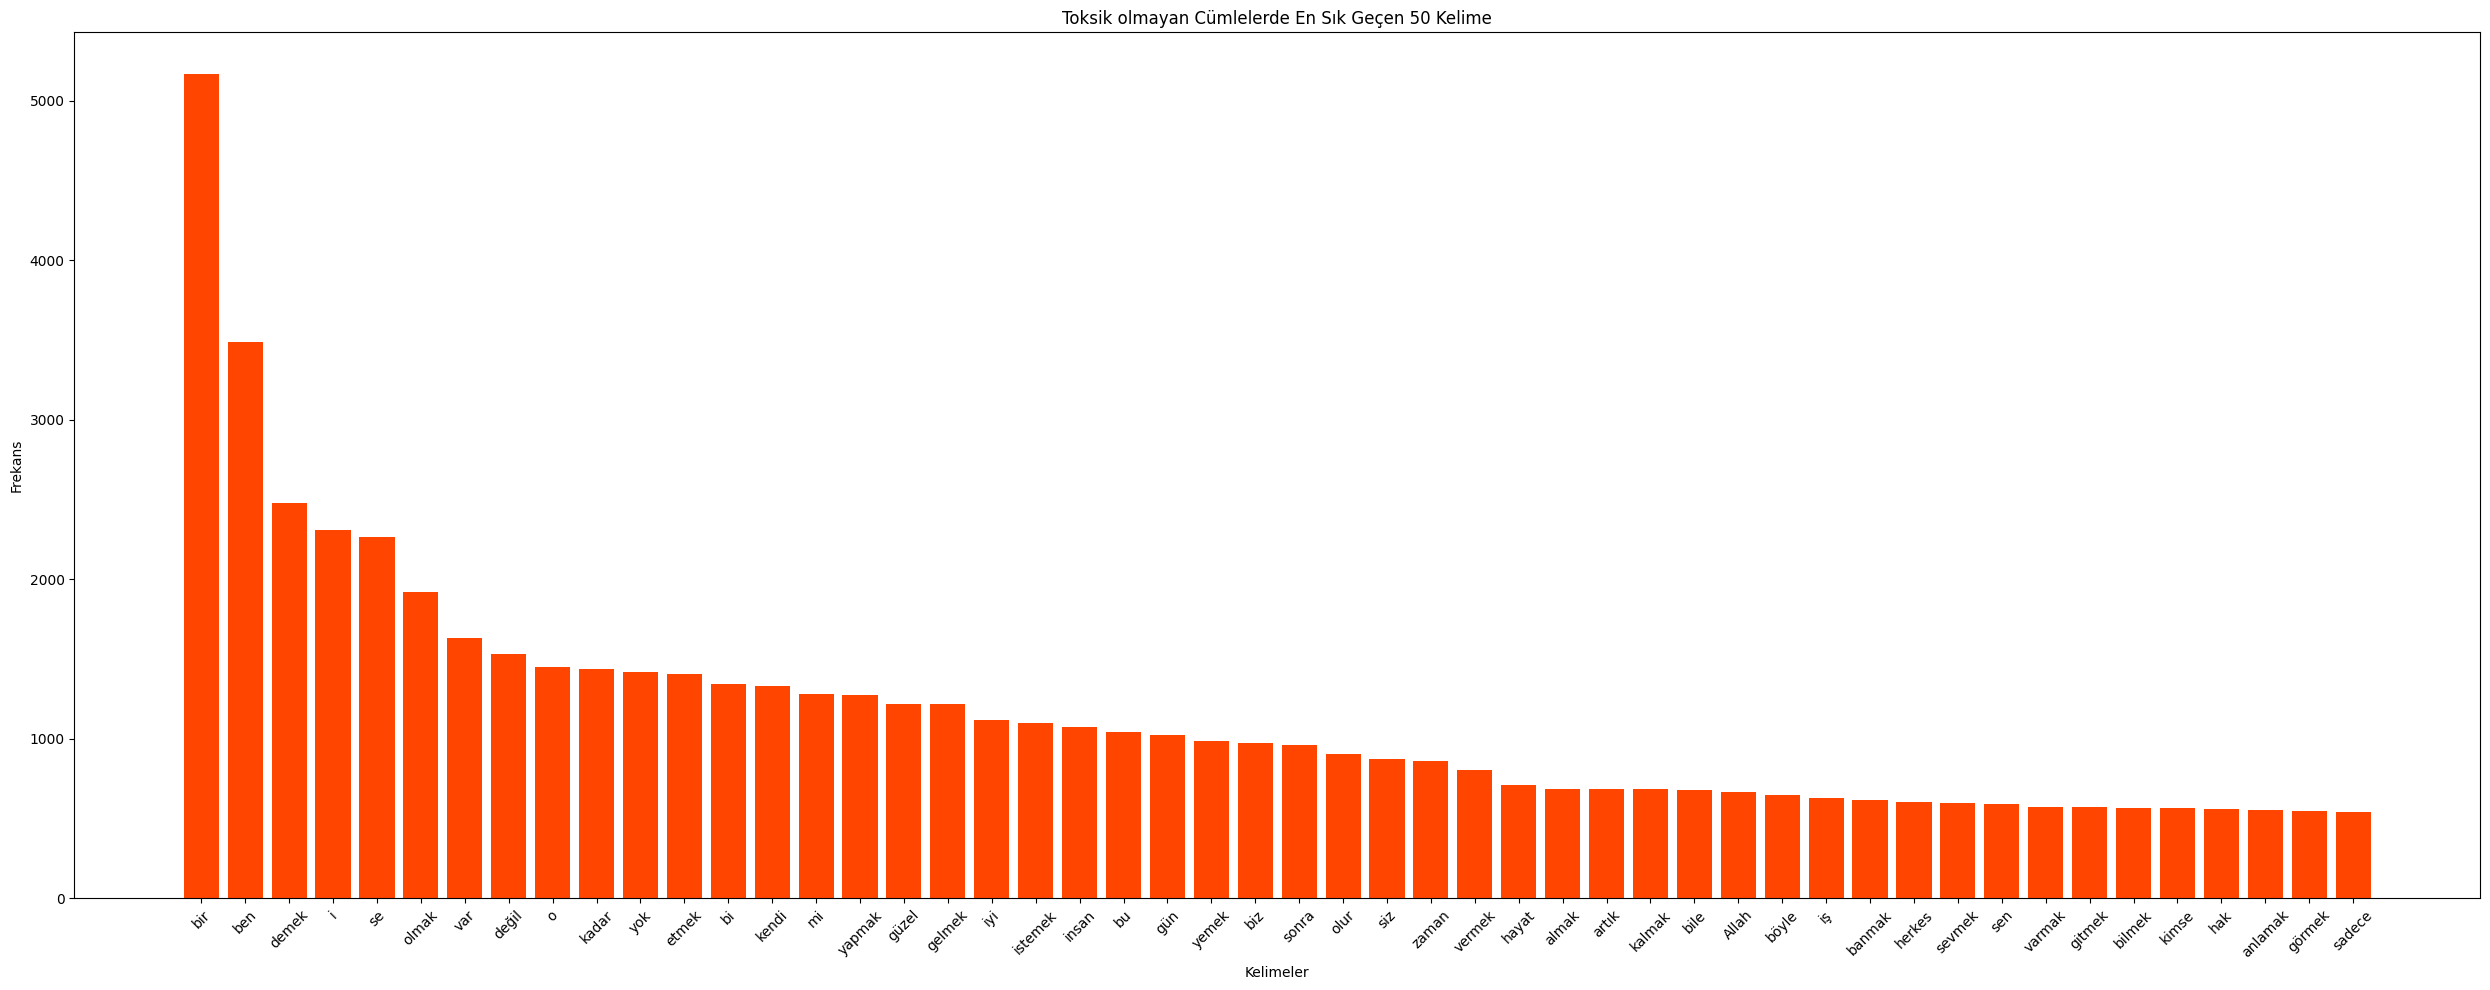

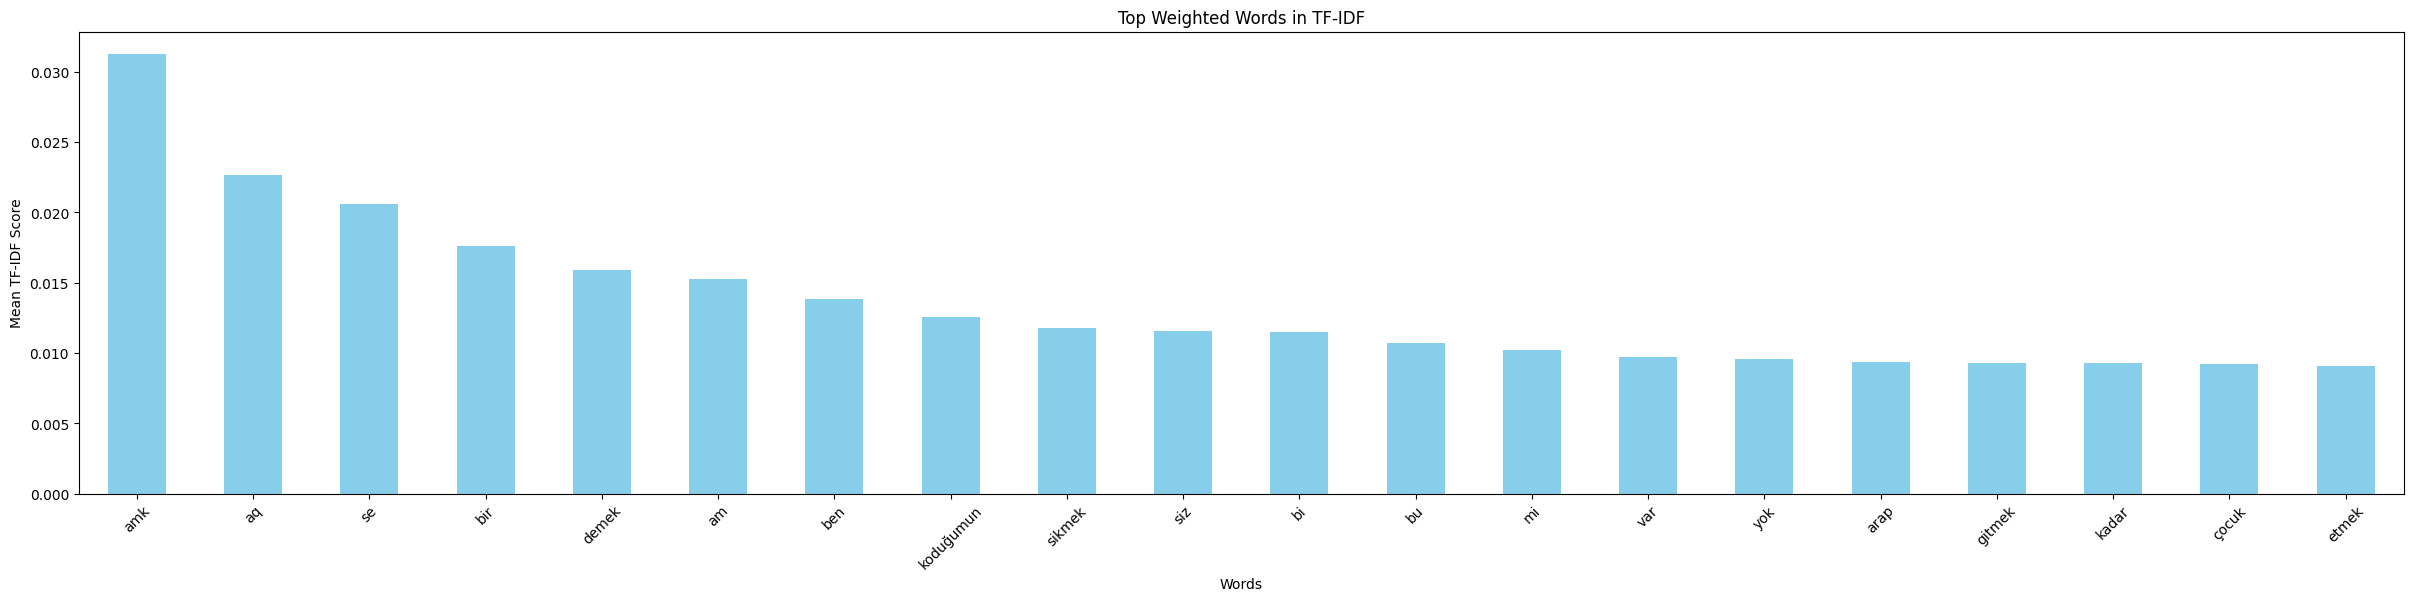

In [262]:
show_frequency(path = 'datasets/test_verileri/deneme_dataset_50k.csv',toxicity = 0,word_count = 50)
toxic_texts = df[df["label"] == 1]["root_text"]
tfidf(toxic_texts)